In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [3]:
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [4]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


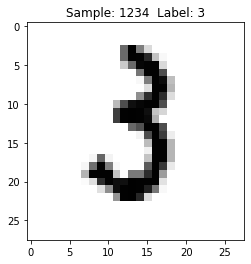

In [5]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

In [13]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [20]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [16]:
history = model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Epoch 1/10
600/600 - 4s - loss: 0.2363 - accuracy: 0.9272 - val_loss: 0.1034 - val_accuracy: 0.9687
Epoch 2/10
600/600 - 4s - loss: 0.1041 - accuracy: 0.9686 - val_loss: 0.0842 - val_accuracy: 0.9758
Epoch 3/10
600/600 - 4s - loss: 0.0778 - accuracy: 0.9766 - val_loss: 0.0821 - val_accuracy: 0.9778
Epoch 4/10
600/600 - 4s - loss: 0.0629 - accuracy: 0.9817 - val_loss: 0.0821 - val_accuracy: 0.9776
Epoch 5/10
600/600 - 4s - loss: 0.0518 - accuracy: 0.9849 - val_loss: 0.0850 - val_accuracy: 0.9792
Epoch 6/10
600/600 - 4s - loss: 0.0481 - accuracy: 0.9860 - val_loss: 0.0834 - val_accuracy: 0.9819
Epoch 7/10
600/600 - 4s - loss: 0.0412 - accuracy: 0.9880 - val_loss: 0.0915 - val_accuracy: 0.9808
Epoch 8/10
600/600 - 4s - loss: 0.0386 - accuracy: 0.9892 - val_loss: 0.0739 - val_accuracy: 0.9837
Epoch 9/10
600/600 - 4s - loss: 0.0373 - accuracy: 0.9902 - val_loss: 0.0815 - val_accuracy: 0.9843
Epoch 10/10
600/600 - 4s - loss: 0.0332 - accuracy: 0.9908 - val_loss: 0.0725 - val_accuracy: 0.9863

In [17]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07251013815402985
Test accuracy: 0.986299991607666


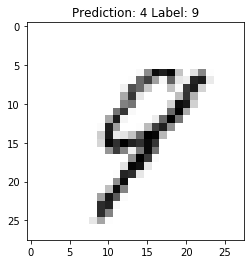

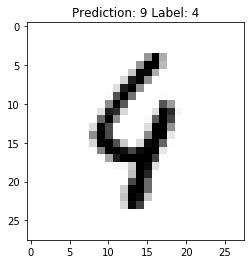

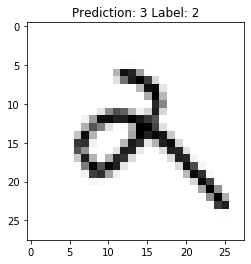

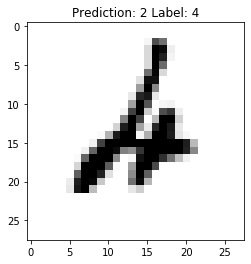

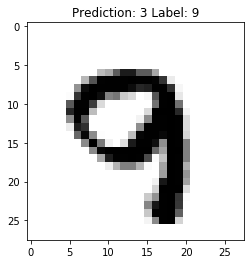

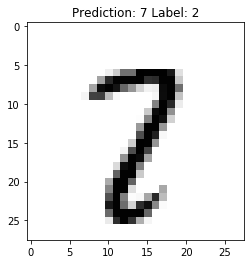

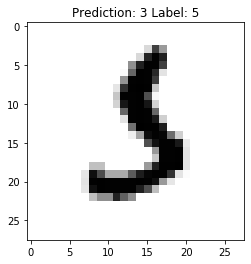

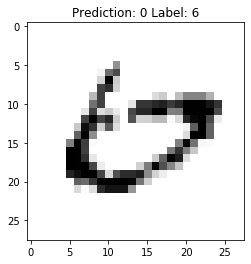

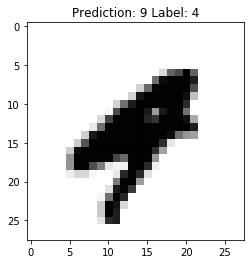

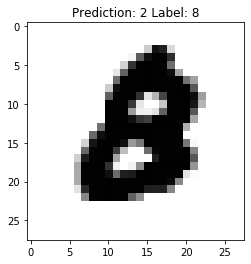

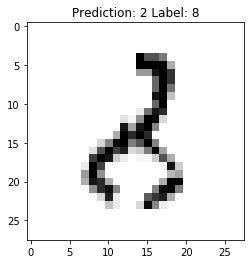

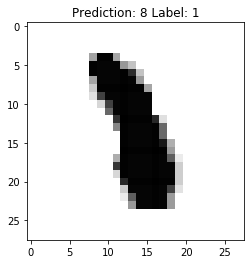

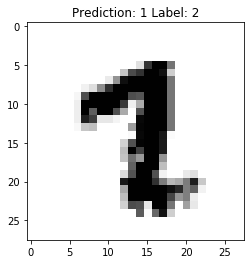

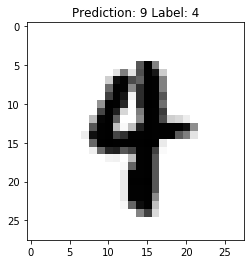

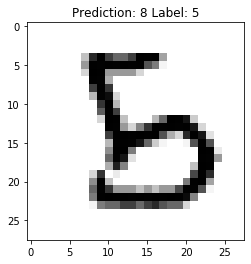

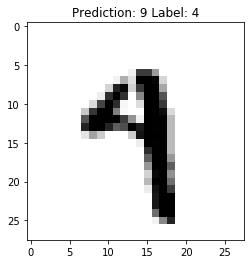

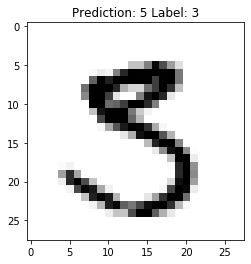

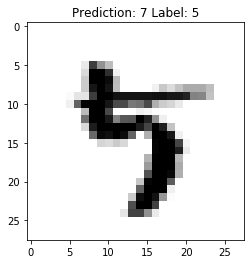

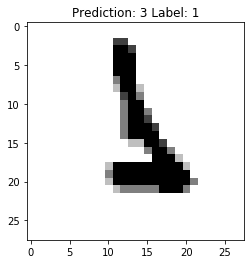

In [18]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()